In [13]:
import sys
sys.path.insert(0, '../..')
import copy
import numpy as np
from model.base import CovidModel, SimulationParameters, set_parameters, normal_ci
from utils import BasicStatistics, RemovePolicy, Propaganda, setup_city_layout, AddPolicyInfectedRate, confidence_interval, multiple_runs
from model.utils import SocialPolicy

In [14]:
listeners = [
    
["AddPolicy", SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL, 0],
["AddPolicy", SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL, 0],
["AddPolicy", SocialPolicy.LOCKDOWN_HIGH_SCHOOL, 0],
["AddPolicy", SocialPolicy.LOCKDOWN_RETAIL, 0],
["AddPolicy", SocialPolicy.LOCKDOWN_FACTORY, 0],
["AddPolicy", SocialPolicy.LOCKDOWN_OFFICE, 0],
["RemovePolicy", SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL, 120],
["RemovePolicy", SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL, 120],
["RemovePolicy", SocialPolicy.LOCKDOWN_HIGH_SCHOOL,120],
["RemovePolicy", SocialPolicy.LOCKDOWN_RETAIL, 120],
["RemovePolicy", SocialPolicy.LOCKDOWN_FACTORY, 120],
["RemovePolicy", SocialPolicy.LOCKDOWN_OFFICE,120],
["AddPolicy", SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL, 150],
["AddPolicy", SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL, 150],
["AddPolicy", SocialPolicy.LOCKDOWN_HIGH_SCHOOL, 150],
["AddPolicy", SocialPolicy.LOCKDOWN_RETAIL, 150],
["AddPolicy", SocialPolicy.LOCKDOWN_FACTORY, 150],
["AddPolicy", SocialPolicy.LOCKDOWN_OFFICE, 150],
["RemovePolicy", SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL, 205],
["RemovePolicy", SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL, 205],
["RemovePolicy", SocialPolicy.LOCKDOWN_HIGH_SCHOOL,205],
["RemovePolicy", SocialPolicy.LOCKDOWN_RETAIL, 205],
["RemovePolicy", SocialPolicy.LOCKDOWN_FACTORY, 205],
["RemovePolicy", SocialPolicy.LOCKDOWN_OFFICE,205]

]

In [15]:
common_parameters = SimulationParameters(
    mask_user_rate = 0.9, # 0.0,
    mask_efficacy = 0.6, #0.0,
    imune_rate = 0.01,
    initial_infection_rate = 0.01,
    hospitalization_capacity = 0.05,
    latency_period_shape = 3,
    latency_period_scale = 1, 
    incubation_period_shape = 6,
    incubation_period_scale = 1, 
    mild_period_duration_shape = 14,
    mild_period_duration_scale = 1,
    hospitalization_period_duration_shape = 12,
    hospitalization_period_duration_scale = 1,
    symptomatic_isolation_rate = 0.0,
    asymptomatic_contagion_probability = 0.1,
#    asymptomatic_contagion_probability = 0.05,
    risk_tolerance_mean = 0.7,
    risk_tolerance_stdev = 0.2,
    herding_behavior_mean = 0.7,
#    herding_behavior_mean = 0.1,
    herding_behavior_stdev = 0.2,
    allowed_restaurant_capacity = 0.25, #1.0, # valid values: {1.0, 0.50, 0.25}
    spreading_rate = normal_ci(2.41, 3.90, 20)
#    spreading_rate = normal_ci(0.5, 1.5, 20)
)

sc = 10

population_size = 1000
simulation_cycles = 360 # days
seed = 31415
np.random.seed(seed)

params = copy.deepcopy(common_parameters)


By changing the coverage of school and work districts over the home districts we can make the disease spread faster or slower as desired .  
def setup_grid_layout(model, population_size,
        home_grid_height, home_grid_width,work_height,work_width, school_height, school_width):
    

Makes a grid of homogeneous home districts, overlaid by school and work districts.
    

home_grid_height is the number of home districts high the grid is, and
    

home_grid_width is the nmber of home districts wide the grid is
    

school height and work height are how many home districts high a school
    

district and work are respectively, and the same for their length.
    

each begins in grid 0,0 and cover the orignal home district grid.
    

Persons assigned to the home districts are also assigned to the school
    

and work districts that cover them. The parameters determine the amount
    

of leakage across groups of people.  With parameters (10,10,1,1,1,1), you get 100
    

completely separated districts with no leakage.  With parameters (6,6,2,2,3,3), illustrated below, you
    

get a grid where every one is connected to everyone else, but there is a
    

degree of separation.  For example, a person in home district (0,0) can be infected
    

by a person in (5,5) but it would be bridged by three infections, slowing the
    

virus down.  Larger sizes for work and school districts enable faster spread. Fastest
    

spread occurs with parameters (1,1,1,1,1,1) or equivalently (10,10, 10,10,10,10)
    

or any of the same number
    

Since this is just a way to allocate human interactions, no label is needed and
    

the grid need not be saved, for interactions to occur, although this informamtion
    

may be useful for visualizations. 


 


<img src="grids.jpg">

 Without locality, the defaults to multiple_run are :  home_grid_height = 1, home_grid_width = 1,work_height = 1, work_width =1, school_height=1, school_width=1.  


Save these seeds if you want to rerun a scenario
[5199, 709, 2507, 9675, 59, 4381, 5830, 1643, 1792, 4833, 3743, 188, 3532, 5700, 503, 3514, 6341, 2091, 9917, 9734, 2412, 722, 6158, 5110, 5729, 2422, 1207, 3240, 2846, 2335]
run with seed 5199:
run with seed 709:
run with seed 2507:
run with seed 9675:
run with seed 59:
run with seed 4381:
run with seed 5830:
run with seed 1643:
run with seed 1792:
run with seed 4833:
run with seed 3743:
run with seed 188:
run with seed 3532:
run with seed 5700:
run with seed 503:
run with seed 3514:
run with seed 6341:
run with seed 2091:
run with seed 9917:
run with seed 9734:
run with seed 2412:
run with seed 722:
run with seed 6158:
run with seed 5110:
run with seed 5729:
run with seed 2422:
run with seed 1207:
run with seed 3240:
run with seed 2846:
run with seed 2335:
using average of time series:
stats on susceptible:
data: [0.9456444444444442, 0.9687833333333332, 0.8171384171384173, 0.5421111111111111, 0.9703666666666666, 0.5731361111111112, 0.6

(<function dict.items>, <function dict.items>, <function dict.items>)

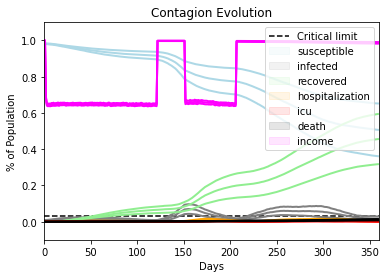

In [16]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)


setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs = 30,fname = "duong0", do_print = True, listeners = listeners)

 Locality slows down the spread, with parameters home_grid_height = 6, home_grid_width = 6,
                  work_height = 2, work_width =2, school_height=3, school_width=3

Save these seeds if you want to rerun a scenario
[9848, 4191, 9931, 6845, 5098, 9704, 2981, 6044, 8070, 5479, 5452, 1743, 9030, 4422, 2547, 5285, 323, 9036, 5626, 5065, 4182, 2494, 5036, 2349, 7381, 6046, 2664, 1909, 7599, 8047]
run with seed 9848:
run with seed 4191:
run with seed 9931:
run with seed 6845:
run with seed 5098:
run with seed 9704:
run with seed 2981:
run with seed 6044:
run with seed 8070:
run with seed 5479:
run with seed 5452:
run with seed 1743:
run with seed 9030:
run with seed 4422:
run with seed 2547:
run with seed 5285:
run with seed 323:
run with seed 9036:
run with seed 5626:
run with seed 5065:
run with seed 4182:
run with seed 2494:
run with seed 5036:
run with seed 2349:
run with seed 7381:
run with seed 6046:
run with seed 2664:
run with seed 1909:
run with seed 7599:
run with seed 8047:
using average of time series:
stats on susceptible:
data: [0.9339104263309032, 0.7832, 0.955211111111111, 0.947761111111111, 0.9309166666666664, 0.740711111111111, 0.968716

(<function dict.items>, <function dict.items>, <function dict.items>)

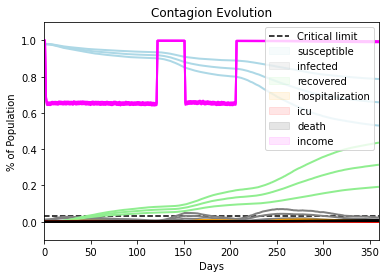

In [17]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)


setLevel(logging.CRITICAL)
seeds =[5, 5348, 8388]
multiple_runs(params,population_size,simulation_cycles,num_runs = 30,fname = "duong1", do_print = True, 
              listeners = listeners, home_grid_height = 6, home_grid_width = 6,
                  work_height = 2, work_width =2, school_height=3, school_width=3)

Save these seeds if you want to rerun a scenario
[6523, 1588, 6538, 777, 5660, 9394, 3871, 9051, 6835, 8715, 5981, 4905, 4482, 320, 787, 8139, 6714, 6536, 9843, 471, 7891, 4475, 4992, 3620, 8774, 7306, 9235, 1129, 1532, 1541]
run with seed 6523:
run with seed 1588:
run with seed 6538:
run with seed 777:
run with seed 5660:
run with seed 9394:
run with seed 3871:
run with seed 9051:
run with seed 6835:
run with seed 8715:
run with seed 5981:
run with seed 4905:
run with seed 4482:
run with seed 320:
run with seed 787:
run with seed 8139:
run with seed 6714:
run with seed 6536:
run with seed 9843:
run with seed 471:
run with seed 7891:
run with seed 4475:
run with seed 4992:
run with seed 3620:
run with seed 8774:
run with seed 7306:
run with seed 9235:
run with seed 1129:
run with seed 1532:
run with seed 1541:
using average of time series:
stats on susceptible:
data: [0.7601333333333334, 0.9179749999999999, 0.773286111111111, 0.9364635364635363, 0.7725555555555556, 0.8018055555555557, 

(<function dict.items>, <function dict.items>, <function dict.items>)

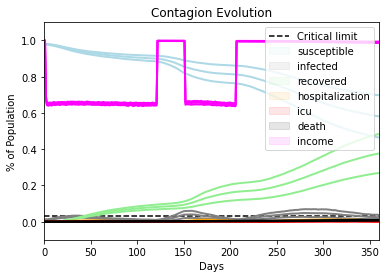

In [18]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)


setLevel(logging.CRITICAL)
seeds = [5, 5348, 8388]
multiple_runs(params,population_size,simulation_cycles,num_runs = 30,fname = "duong2", do_print = True, 
              listeners = listeners, home_grid_height = 3, home_grid_width = 4,
                  work_height = 1, work_width =2, school_height=2, school_width=1)

Save these seeds if you want to rerun a scenario
[1581, 6398, 9911, 619, 8077, 6940, 7912, 360, 4868, 9088, 3684, 9403, 9072, 9351, 3513, 4765, 4069, 6533, 2802, 9229, 1772, 1172, 59, 4166, 5129, 473, 8257, 9254, 5080, 4886]
run with seed 1581:
run with seed 6398:
run with seed 9911:
run with seed 619:
run with seed 8077:
run with seed 6940:
run with seed 7912:
run with seed 360:
run with seed 4868:
run with seed 9088:
run with seed 3684:
run with seed 9403:
run with seed 9072:
run with seed 9351:
run with seed 3513:
run with seed 4765:
run with seed 4069:
run with seed 6533:
run with seed 2802:
run with seed 9229:
run with seed 1772:
run with seed 1172:
run with seed 59:
run with seed 4166:
run with seed 5129:
run with seed 473:
run with seed 8257:
run with seed 9254:
run with seed 5080:
run with seed 4886:
using average of time series:
stats on susceptible:
data: [0.7885388888888889, 0.8771111111111111, 0.9513388888888888, 0.9803694444444447, 0.8762237762237763, 0.8993944444444446, 0

(<function dict.items>, <function dict.items>, <function dict.items>)

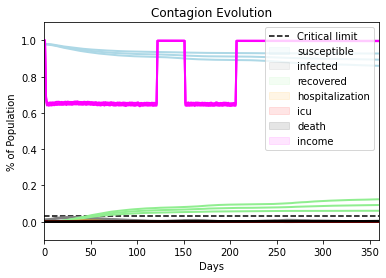

In [19]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)


setLevel(logging.CRITICAL)
seeds = [5, 5348, 8388]
multiple_runs(params,population_size,simulation_cycles,num_runs = 30,fname = "duong3", do_print = True, 
              listeners = listeners, home_grid_height = 3, home_grid_width = 4,
                  work_height = 1, work_width =1, school_height=1, school_width=1)

In [ ]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)


setLevel(logging.CRITICAL)
seeds = [5, 5348, 8388]
multiple_runs(params,population_size,simulation_cycles,num_runs = 30,fname = "duong4", do_print = True, 
              listeners = listeners, home_grid_height = 10, home_grid_width = 10,
                  work_height = 1, work_width =1, school_height=1, school_width=1)

Save these seeds if you want to rerun a scenario
[5339, 4686, 1001, 397, 5500, 9818, 8560, 5379, 7223, 1940, 8414, 6793, 858, 8559, 6741, 1127, 984, 9319, 3715, 1635, 6708, 1337, 8668, 4840, 3272, 9497, 6581, 4776, 4236, 1078]
run with seed 5339:
run with seed 4686:
run with seed 1001:
run with seed 397:
run with seed 5500:
run with seed 9818:
run with seed 8560:
run with seed 5379:
run with seed 7223:
run with seed 1940:
run with seed 8414:
run with seed 6793:
run with seed 858:
run with seed 8559:
